# DATA COLLECTION

In [1]:
import yfinance
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#fetching data
#timeline [April 2022-May 2025]
#source- yahoofinance
bluechip_stocks = {
    1: "RELIANCE.NS",    # Reliance Industries (NSE, India)
    2: "TCS.NS",         # Tata Consultancy Services (NSE, India)
    3: "HDFCBANK.NS",    # HDFC Bank (NSE, India)
    4: "ICICIBANK.NS",   # ICICI Bank (NSE, India)
    5: "INFY.NS",        # Infosys (NSE, India)
    
    6: "MSFT",           # Microsoft (NYSE, USA)
    7: "AAPL",           # Apple (NYSE, USA)
    8: "NVDA",           # NVIDIA (NYSE, USA)
    9: "GOOGL",         # Alphabet (NYSE, USA)
    10: "AMZN",          # Amazon (NYSE, USA)
    
    11: "MC.PA",         # LVMH (Euronext, France)
    12: "ASML.AS",       # ASML Holding (Euronext, Netherlands)
    13: "OR.PA",         # L'Oréal (Euronext, France)
    14: "SAP.DE",        # SAP SE (Euronext, Germany)
    15: "TTE.PA "        # TotalEnergies (Euronext, France)
}

#choosing the stocks
stock_1,stock_2,stock_3=bluechip_stocks[1],bluechip_stocks[6],bluechip_stocks[13]
stocks=[stock_1,stock_2,stock_3]

#function for getting the data
def get_stock_data(stock):
    df=pd.DataFrame()
    df=yfinance.download(stock,start="2022-04-01",end="2025-05-31",interval="1d")
    return df

#data for the three chosen stocks
data_1=get_stock_data(stock_1)
data_2=get_stock_data(stock_2)
data_3=get_stock_data(stock_3)





C:\Users\91933\AppData\Local\Temp\ipykernel_3040\2149974832.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yfinance.download(stock,start="2022-04-01",end="2025-05-31",interval="1d")
[*********************100%***********************]  1 of 1 completed
C:\Users\91933\AppData\Local\Temp\ipykernel_3040\2149974832.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yfinance.download(stock,start="2022-04-01",end="2025-05-31",interval="1d")
[*********************100%***********************]  1 of 1 completed
C:\Users\91933\AppData\Local\Temp\ipykernel_3040\2149974832.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yfinance.download(stock,start="2022-04-01",end="2025-05-31",interval="1d")
[*********************100%***********************]  1 of 1 completed


In [3]:
#exrracting only the closing prices
data_1=data_1["Close"]
data_2=data_2["Close"]
data_3=data_3["Close"]

#saving these as a single csv files
data_1.to_csv("data_1.csv")
data_2.to_csv("data_2.csv")
data_3.to_csv("data_3.csv")

In [2]:
#using the csv files to load data_1,data_2,data_3 
data_1=pd.read_csv("data_1.csv")
data_2=pd.read_csv("data_2.csv")
data_3=pd.read_csv("data_3.csv")

#using date as index
data_1=data_1.set_index("Date")
data_2=data_2.set_index("Date")
data_3=data_3.set_index("Date")


# Working with the first stock

In [3]:
#RELIANCE.NS

#this can be changed accordingly
X=data_1
test_size=0.2



# analysis using first data
train_size=int((1-test_size)*len(X))
X_train,X_test=X.iloc[:train_size],X.iloc[train_size:]


X_test=X_test.iloc[:50]

print(X_train.shape,X_test.shape)

(624, 1) (50, 1)


**I will focus on only 20 forecast into the future. Long term forecasts are not good anyway**

# Checking for Stationarity (ADF Test)

In [6]:
#testting for the stationarity of the chosen series
#using Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def test_stationarity_adf(timeseries,autolag="AIC",maxlag=None):

    '''
    lag: can be "AIC" or "BIC"
    '''

    print("Results of Dickey-Fuller Test:")
    dftest=adfuller(timeseries,autolag=autolag,maxlag=maxlag)
    # Format results
    df_output = pd.Series(dftest[0:4], index=[
        "Test Statistic", 
        "p-value",
        "#Lags Used", 
        "Number of Observations Used"
    ])
    return df_output
test_stationarity_adf(X_train,maxlag=None,autolag="BIC")



Results of Dickey-Fuller Test:


Test Statistic                  -1.403462
p-value                          0.580615
#Lags Used                       0.000000
Number of Observations Used    623.000000
dtype: float64

# ADF TEST on the first difference

In [7]:
# above result shows that series is not stationary . We now check for the first differece.
test_stationarity_adf(X_train.diff().dropna(),maxlag=None,autolag="AIC")


Results of Dickey-Fuller Test:


Test Statistic                 -25.754487
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    622.000000
dtype: float64

In [8]:
# Now, the differenced series is stationary. hence, we got d=1 of ARIMA model.

## Confirming the results with the Phillips Perron Test

In [12]:
from arch.unitroot import PhillipsPerron

def test_stationarity_pp(timeseries, lags=None, trend='c'):
    '''
    timeseries: the time series to test
    lags: number of lags to use; if None, automatically selected
    trend: 'c' (constant), 'ct' (constant + trend), or 'n' (none)
    '''

    print("Results of Phillips-Perron Test:")
    pp_test = PhillipsPerron(timeseries, lags=lags, trend=trend)
    
    # Collecting the test output
    result = {
        "Test Statistic": pp_test.stat,
        "p-value": pp_test.pvalue,
        "#Lags Used": pp_test.lags,
        "Trend": trend,
        "Critical Values": pp_test.critical_values
    }

    return pd.Series(result)

# Example usage
test_stationarity_pp(X_train, lags=None, trend='c')


Results of Phillips-Perron Test:


Test Statistic                                             -1.277426
p-value                                                     0.639436
#Lags Used                                                        19
Trend                                                              c
Critical Values    {'1%': -3.440890045708521, '5%': -2.8661904001...
dtype: object

In [13]:
test_stationarity_pp(X_train.diff().dropna(), lags=None, trend='c')

Results of Phillips-Perron Test:


Test Statistic                                            -25.947622
p-value                                                          0.0
#Lags Used                                                        19
Trend                                                              c
Critical Values    {'1%': -3.4409070618215996, '5%': -2.866197894...
dtype: object

# Plotting the ACF and PACF

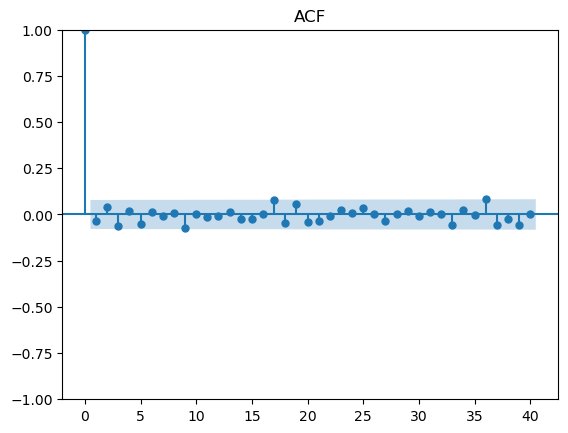

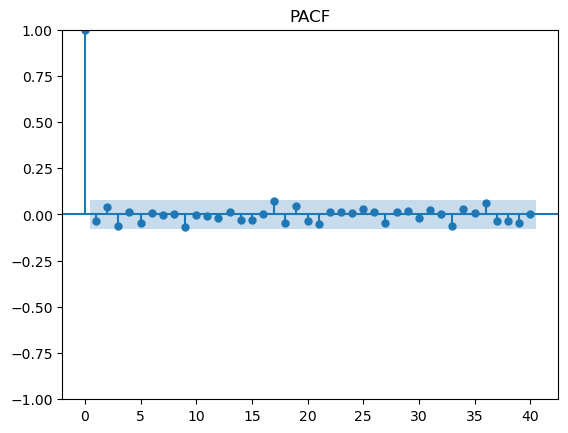

In [9]:
diff_series = X_train.diff().dropna()


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plot_acf(diff_series, lags=40)
plt.title("ACF")
plt.show()

plot_pacf(diff_series, lags=40)
plt.title("PACF")
plt.show()

# USING pmdarima for finding the best ARIMA parameters

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5355.696, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5357.039, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5358.189, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5358.080, Time=0.26 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=5359.977, Time=0.29 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=5360.472, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5356.989, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5355.506, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5357.102, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5358.863, Time=0.28 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=5360.733, Time=0.41 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5357.996, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5357.124, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5359.380, Time=0.53 sec
 ARIMA(3,1,0)(0

C:\Users\91933\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\91933\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


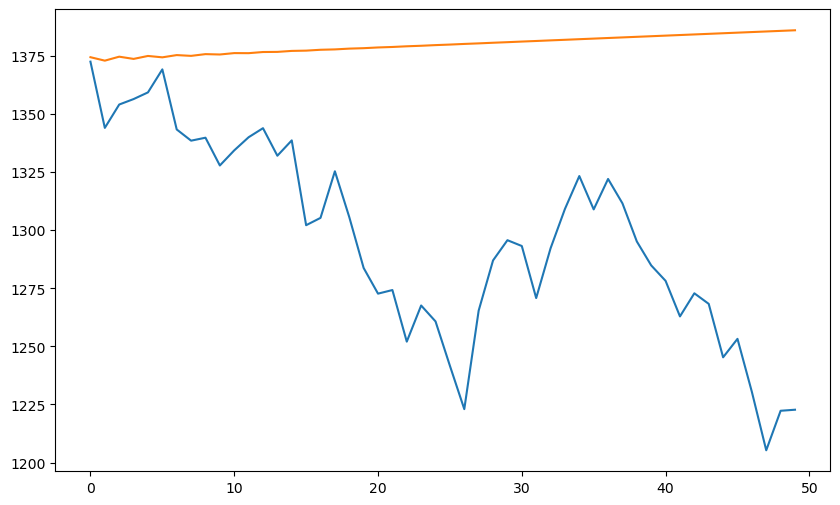

In [10]:
from pmdarima.model_selection import RollingForecastCV
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

cv = RollingForecastCV(h=10, initial=0.8)  # 80% initial train, rolling forecast

model_arima = auto_arima(X_train,
                   d=1,
                   start_p=0, max_p=40,
                   start_q=0, max_q=40,
                   seasonal=False,
                   cv=cv,
                   stepwise=False,  # exhaustive search
                   error_action='ignore',
                   suppress_warnings=True,
                   trace=True,
                   scoring='mse')

print(model_arima.summary())



model_arima.fit(X_train)
n_periods = len(X_test)
forecast = model_arima.predict(n_periods=n_periods)



plt.figure(figsize=(10,6))
X_test=X_test.reset_index(drop=True)
forecast.reset_index(drop=True,inplace=True)

plt.plot(X_test)


plt.plot(forecast)
plt.show()



# Residual Analysis

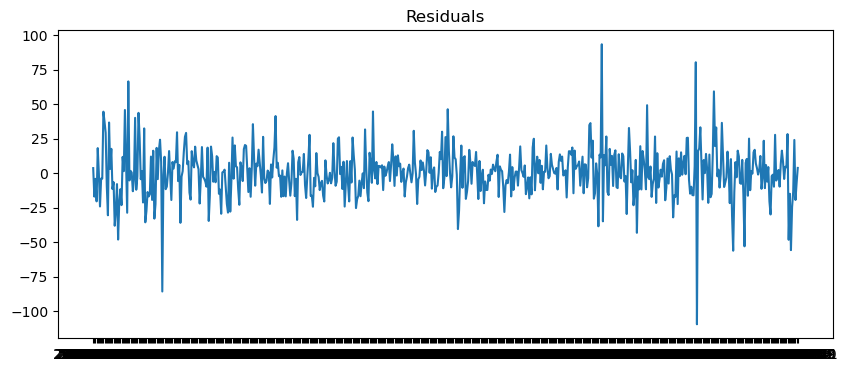

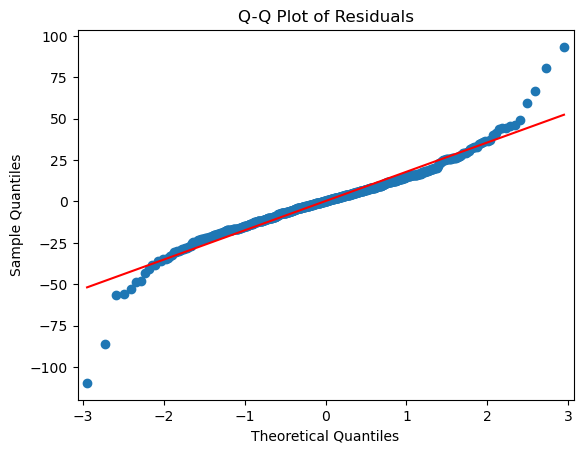

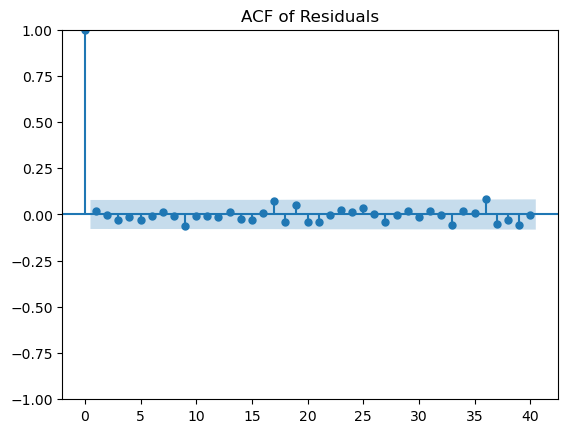

In [14]:
from statsmodels.tsa.arima.model import ARIMA

import warnings

warnings.filterwarnings("ignore")

model=ARIMA(X_train,order=(1,1,1))
model_fit=model.fit()

residuals=model_fit.resid
residuals=residuals.iloc[1:]



import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Residual plot
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title("Residuals")
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# ACF of residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title("ACF of Residuals")
plt.show()



# Ljung-Box Q test 

In [15]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# residuals is typically model_fit.resid
lb_test = acorr_ljungbox(residuals, lags=[10,20,30,35], return_df=True)
print(lb_test)

      lb_stat  lb_pvalue
10   4.082671   0.943540
20  12.779625   0.886638
30  16.489357   0.978208
35  19.035976   0.987127


__denotes the absense of autocorrelation__

In [16]:
from scipy.stats import shapiro


stat, p = shapiro(residuals)
print("Shapiro-Wilk Test Statistic =", stat)
print("p-value =", p,"\n")

if p > 0.05:
    print("Residuals are likely normally distributed (fail to reject H_0)")
else:
    print("Residuals are not normally distributed (reject H_0)")


Shapiro-Wilk Test Statistic = 0.9476602077484131
p-value = 4.8600297506036505e-14 

Residuals are not normally distributed (reject H_0)


# using statsmodels to forecast 5 step at a time using the best fitted model (walk-forward forecast)

1 stage Walk-Forward RMSE: 16.5055


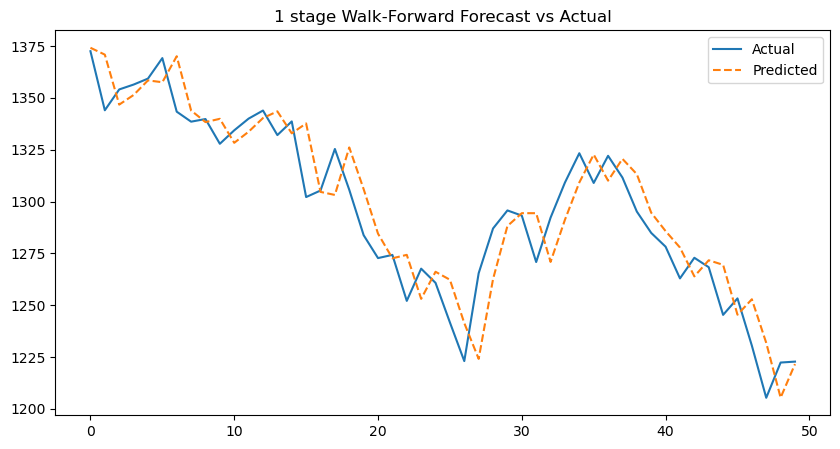

In [17]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Flatten and convert to float
X_train_flat = X_train.values.ravel() if hasattr(X_train, 'values') else np.ravel(X_train)
X_test_flat = X_test.values.ravel() if hasattr(X_test, 'values') else np.ravel(X_test)

train = list(X_train_flat.astype(float))
test = list(X_test_flat.astype(float))

predictions_arima = []
order = (1, 1, 1)  # Replace with optimal order
step_size = 1

for t in range(0, len(test), step_size):
    model = ARIMA(np.array(train), order=order)
    model_fit = model.fit()
    
    # Forecast up to 5 steps ahead (or fewer at the end)
    steps = min(step_size, len(test) - t)
    forecast = model_fit.forecast(steps=steps)
    predictions_arima.extend(forecast)
    
    # Update train with the actual next 5 values
    actuals = test[t:t + steps]
    train.extend(actuals)

 
    
# Evaluation and plot
rmse = np.sqrt(mean_squared_error(test[:len(predictions_arima)], predictions_arima))
print(f"{step_size} stage Walk-Forward RMSE: {rmse:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(test, label='Actual')
plt.plot(predictions_arima, label='Predicted', linestyle='--')
plt.legend()
plt.title(f"{step_size} stage Walk-Forward Forecast vs Actual")
plt.show()


# ARIMA-GARCH MODEL

In [18]:
# ARCH -LM test for ARIMA residuals

In [19]:
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch

lags=range(10,30,5)

# ARCH LM test from statsmodels
for lag in lags:
    lm_test = het_arch(residuals, nlags=lag) 
    print(f"Results of Arch LM test for ARIMA residuals for lags= {lag}")
    print("LM Stat:", lm_test[0])
    print("p-value:", lm_test[1])
    print("\n")


Results of Arch LM test for ARIMA residuals for lags= 10
LM Stat: 29.323004886659305
p-value: 0.0011044695158418955


Results of Arch LM test for ARIMA residuals for lags= 15
LM Stat: 35.21109355840908
p-value: 0.0022943827143197698


Results of Arch LM test for ARIMA residuals for lags= 20
LM Stat: 37.83004244161914
p-value: 0.009288565768870473


Results of Arch LM test for ARIMA residuals for lags= 25
LM Stat: 39.951627182996525
p-value: 0.029499774530246454




**Since, p-value is less than 0.05 for all these lags, the use of GARCH model is justified. This test
(ARCH-LM) is used to detect the conditional hetroskedasticity, i.e. volatility clustering in time series residuals.**


In [20]:
from arch import arch_model

best_aic = float('inf')
best_order = None
best_model = None

for p in range(1, 4):   # GARCH lags
    for q in range(1, 4):  # ARCH lags
        try:
            model = arch_model(residuals, vol='GARCH', p=p, q=q)
            fitted = model.fit(disp="off")
            if fitted.aic < best_aic:
                best_aic = fitted.aic
                best_order = (p, q)
                best_model = fitted
        except:
            continue

print(f"Best GARCH order: p={best_order[0]}, q={best_order[1]}")
print(f"Lowest AIC: {best_aic}")


Best GARCH order: p=1, q=2
Lowest AIC: 5296.68887505313


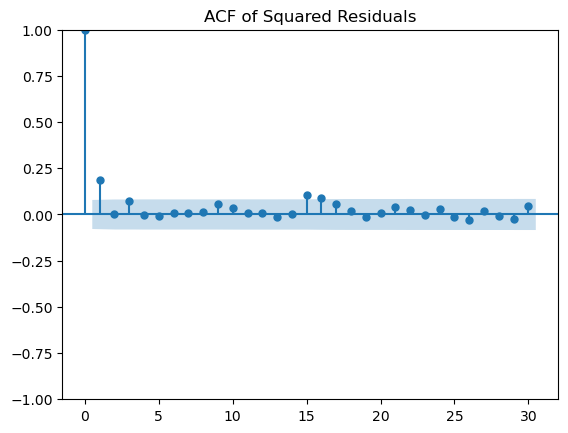

In [21]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.graphics.tsa.plot_acf(residuals**2, lags=30)
plt.title("ACF of Squared Residuals")
plt.show()


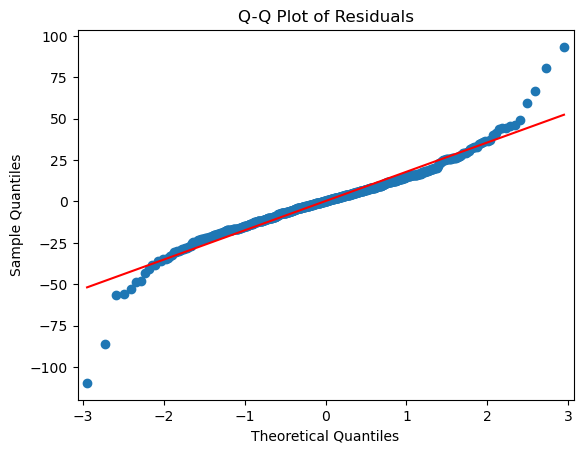

In [22]:
# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")


plt.savefig("plot_1.png", dpi=300, bbox_inches='tight')# Options: png, jpg, pdf, svg

plt.show()
plt.close()


In [23]:
from scipy.stats import jarque_bera

jb_stat, p = jarque_bera(residuals)
print(f"Jarque-Bera p-value: {p}")


Jarque-Bera p-value: 0.0


In [24]:
from scipy.stats import skew
skewness_value = skew(residuals)

print(f"Skewness = {skewness_value:.4f}")


Skewness = -0.1135


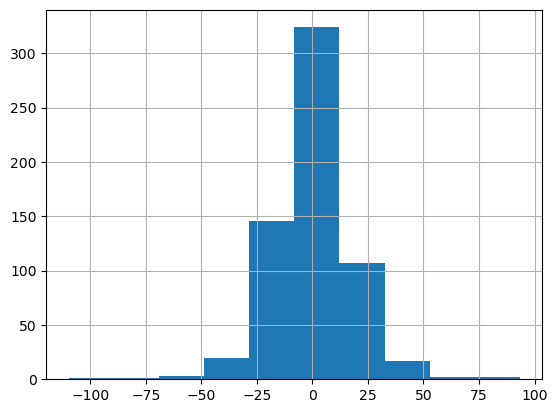

In [25]:
plt.hist(residuals);
plt.grid(True)

__Since the resdiduals are symmetric, we can use GARCH__


__update-1: TGARCH performed better than GARCH(1,2)__


GARCH Summary:
                         Constant Mean - GARCH Model Results                         
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2614.62
Distribution:      Standardized Student's t   AIC:                           5241.24
Method:                  Maximum Likelihood   BIC:                           5267.85
                                              No. Observations:                  623
Date:                      Sat, Jul 05 2025   Df Residuals:                      622
Time:                              21:29:38   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------

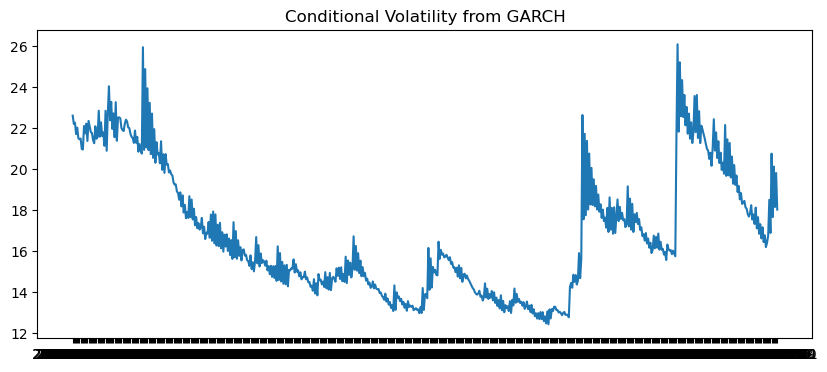

In [26]:
from arch import arch_model
garch_model = arch_model(residuals, vol='GARCH', p=1, q=2, dist='t')  # or dist='t'
garch_result = garch_model.fit(disp='off')


print("\nGARCH Summary:\n", garch_result.summary())


plt.figure(figsize=(10, 4))
plt.plot(garch_result.conditional_volatility)
plt.title("Conditional Volatility from GARCH")
plt.savefig("plot_22.png", dpi=300, bbox_inches='tight')# Options: png, jpg, pdf, svg
plt.show()


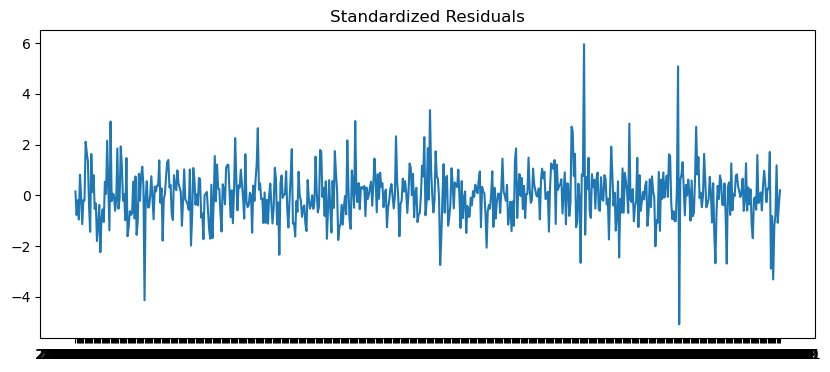

In [27]:
std_resid = garch_result.std_resid

plt.figure(figsize=(10,4))
plt.plot(std_resid)
plt.title("Standardized Residuals")
plt.show()

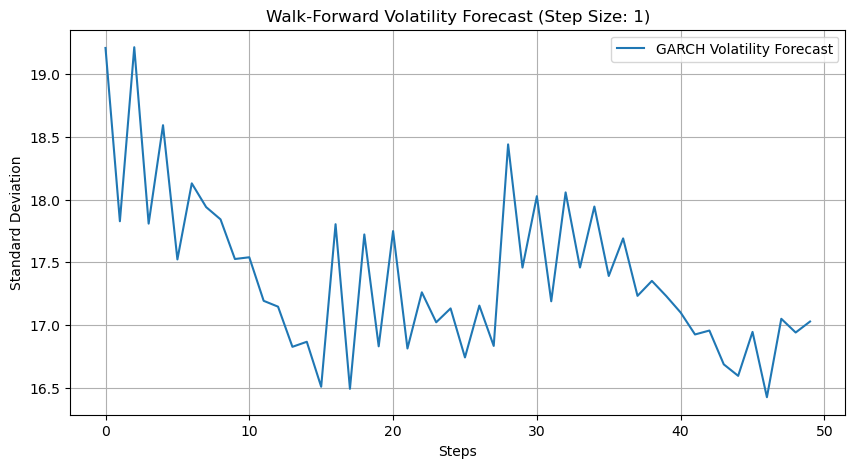

In [29]:
def garch_volatility_forecast(arima_residuals_train, test_residuals, step_size=1, garch_order=(1,1)):
    """
    Walk-forward GARCH volatility forecasting (updated for arch 4.15+)
    
    Parameters:
    arima_residuals_train (array-like): ARIMA residuals from training period
    test_residuals (array-like): ARIMA residuals from test period
    step_size (int): Forecast horizon at each step
    garch_order (tuple): (p,q) order for GARCH model
    
    Returns:
    numpy.ndarray: Standard deviation forecasts (volatility)
    """
    volatility_forecasts = []
    history = list(arima_residuals_train.copy())
    
    for t in range(0, len(test_residuals), step_size):
        # 1. Fit GARCH model
        model = arch_model(history, vol='Garch', p=garch_order[0], q=garch_order[1],dist="t")
        model_fit = model.fit(disp='off')
        
        # 2. Forecast volatility
        steps = min(step_size, len(test_residuals) - t)
        forecast = model_fit.forecast(horizon=steps, reindex=False)
        
        # 3. Get standard deviation - new method for arch 4.15+
        # variance is in .variance, take sqrt to get std dev
        std_dev = np.sqrt(forecast.variance.values[-1, :])
        volatility_forecasts.extend(std_dev)
        
        # 4. Update history with actual test residuals
        history.extend(test_residuals[t:t+steps])
    
    return np.array(volatility_forecasts)

X_test_values=np.array(X_test).reshape(len(X_test),)


# Get volatility forecasts
volatility_forecast = garch_volatility_forecast(
    arima_residuals_train=residuals,
    test_residuals=X_test_values-predictions_arima,
    step_size=step_size,
    garch_order=(1,2)
)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(volatility_forecast, label='GARCH Volatility Forecast')
plt.title(f'Walk-Forward Volatility Forecast (Step Size: {step_size})')
plt.xlabel('Steps')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

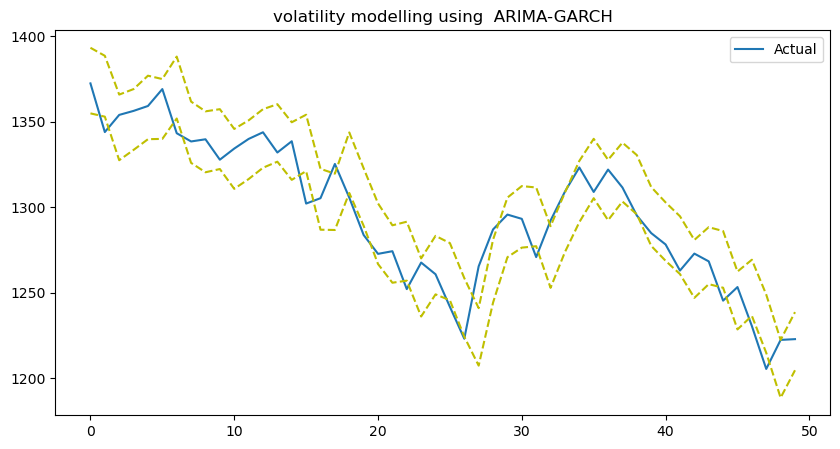

In [31]:
arima_garch_forecast_upper=predictions_arima+ volatility_forecast
arima_garch_forecast_lower=predictions_arima-volatility_forecast


plt.figure(figsize=(10, 5))
plt.plot(test, label='Actual')
plt.plot(arima_garch_forecast_lower,  linestyle='--',color="y")
plt.plot(arima_garch_forecast_upper,  linestyle='--',color="y")
plt.legend()
plt.title(f"volatility modelling using  ARIMA-GARCH")
plt.show()


## checking versionjs

In [32]:
import numpy
print(numpy.__version__)

1.23.5


In [33]:
import pmdarima
print(pmdarima.__version__)

2.0.4


## ARIMA-LSTM model

In [34]:
squared_residuals_arima=residuals**2

In [35]:
squared_residuals_arima.describe()

count      623.000000
mean       312.875702
std        834.852773
min          0.000050
25%         17.453396
50%         94.469526
75%        280.938728
max      12006.776248
Name: None, dtype: float64

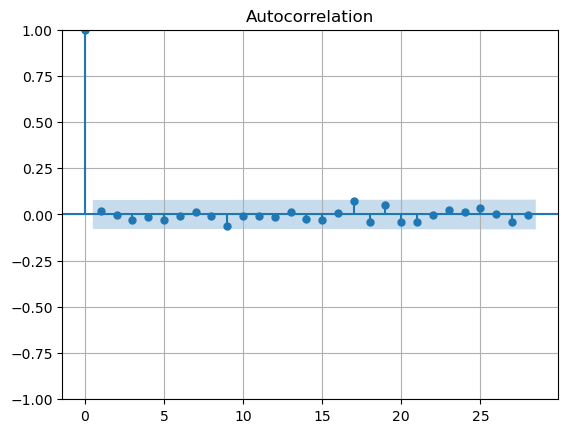

In [36]:
plot_acf(residuals)
plt.grid(True)

**optimal lag according to ACF plot is 16**

In [37]:
pip install numpy==1.23.5


In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Convert residuals to supervised learning format
def create_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df_supervised = pd.concat(columns, axis=1)
    df_supervised.fillna(0, inplace=True)
    return df_supervised.values

# Example: use lag=1 (can be tuned)
lag = 16
supervised = create_supervised(residuals, lag)
X, y = supervised[:, :-1], supervised[:, -1]

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Reshape for LSTM [samples, features,timestamp]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1,lag))



In [39]:
X_scaled.mean(axis=0)


array([[0.54126606, 0.54132276, 0.54147681, 0.54128691, 0.54139284,
        0.54158803, 0.54202959, 0.5421482 , 0.54253059, 0.54230711,
        0.54227392, 0.54223762, 0.54227121, 0.54220642, 0.54207792,
        0.5420258 ]])

In [40]:
X_scaled.var()


0.007397161386025931

In [41]:
X_scaled.shape

(623, 1, 16)

In [36]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import itertools

# Your existing setup
lag = 16
supervised = create_supervised(residuals, lag)
X, y = supervised[:, :-1], supervised[:, -1]

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).ravel()

# Reshape for LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, lag))

# Hyperparameter grid
param_grid = {
    'units': [25, 50, 75,100],
    'dropout_rate': [0.0, 0.2,0.4],
    'batch_size': [8, 16],
    'optimizer': ['adam']
}

param_combinations = list(itertools.product(*param_grid.values()))

# One-step ahead cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Model builder
def build_model(units, dropout_rate, optimizer):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=(1, lag)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Grid Search Loop
best_rmse = float('inf')
best_params = None

for params in param_combinations:
    units, dropout_rate, batch_size, optimizer = params
    rmses = []

    for train_idx, val_idx in tscv.split(X_scaled):
        X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
        y_train, y_val = y_scaled[train_idx], y_scaled[val_idx]

        model = build_model(units, dropout_rate, optimizer)
        model.fit(X_train, y_train, epochs=25, batch_size=batch_size, verbose=0)

        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmses.append(rmse)

    avg_rmse = np.mean(rmses)
    print(f"Params: {params} → Avg RMSE: {avg_rmse:.5f}")

    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_params = params

print(f"\n✅ Best Parameters: {best_params} → RMSE: {best_rmse:.5f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000259C66059D0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Params: (25, 0.0, 8, 'adam') → Avg RMSE: 0.08

In [42]:
# Define LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(75, activation='relu',dropout=0.4, input_shape=(X_scaled.shape[1], X_scaled.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Fit model
model_lstm.fit(X_scaled, y_scaled, epochs=100, batch_size=8, verbose=1)


Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1202
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0191
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0155
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0122
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0110 
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094
Epoch 9/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084
Epoch 10/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0094
Epoch 11/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0073
Epoch 12/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0078
Epoch 13/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084
Epoch 14/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084
Epoch 15/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065
Ep

In [43]:
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 75)                  │          27,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              76 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,030 (324.34 KB)

 Trainable params: 27,676 (108.11 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 55,354 (216.23 KB)

In [44]:
# Start with the last `lag` residuals
last_input = residuals[-lag:]  # shape: (16,)
lstm_predictions = []
last_input=np.array(last_input)
# Normalize using the same scaler used for X
last_input_scaled = scaler.transform(last_input.reshape(-1, 1)).flatten()

n_pred=15

for _ in range(n_pred):
    # Reshape to match LSTM input shape: (1 sample, 1 timestep, lag features)
    input_reshaped = last_input_scaled.reshape(1, 1, lag)

    # Predict the next residual
    next_pred_scaled = model_lstm.predict(input_reshaped, verbose=0)

    # Inverse transform to original scale
    next_pred = scaler.inverse_transform(next_pred_scaled)[0, 0]

    # Save prediction
    lstm_predictions.append(next_pred)

    # Update input: remove oldest, append newest predicted value (scaled)
    last_input_scaled = np.append(last_input_scaled[1:], next_pred_scaled)

# Final predictions (in original scale)
print(f"Next {n_pred} predicted residuals:\n", lstm_predictions)


Next 15 predicted residuals:
 [-1.9697497, -1.5580165, -2.6563265, -1.4525735, -1.797422, -1.2864265, -2.3111634, -1.7156488, -2.3499153, -2.025241, -2.2278297, -1.9549456, -2.1102798, -2.147665, -2.0614288]


In [45]:
predictions_arima[:n_pred]

[1374.1801448902354,
 1370.8725119296091,
 1346.7585482488391,
 1351.3879543662151,
 1358.4415838783116,
 1357.5527242516903,
 1370.0959114423188,
 1343.9182086617932,
 1338.319835905128,
 1339.9009792818865,
 1328.3242869116707,
 1333.6769584289373,
 1340.2743567665584,
 1343.505051840938,
 1332.9028671106782]

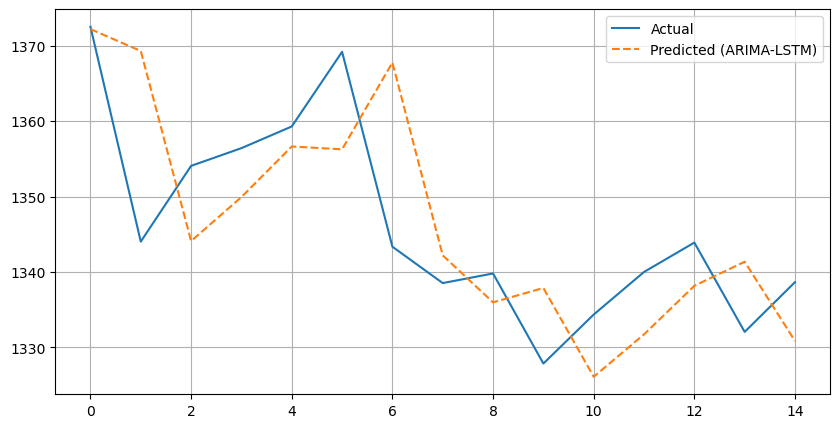

RMSE is 11.542605264449973


In [46]:
arima_lstm_predictions=np.array(predictions_arima[:n_pred])+np.array(lstm_predictions)
plt.figure(figsize=(10, 5))
plt.plot(X_test.iloc[:n_pred],label="Actual")
plt.plot(arima_lstm_predictions,label='Predicted (ARIMA-LSTM)', linestyle='--')
plt.grid(True)


plt.legend()
plt.show()


rmse = np.sqrt(mean_squared_error(X_test[:n_pred],arima_lstm_predictions))
print(f"RMSE is {rmse}")


## ARIMA-LSTM (lag selection with random forest)

**We have**
X_scaled,y_scaled

In [47]:
def create_lagged_features(series, max_lag=16):
    df = pd.DataFrame({'y': series})
    for lag in range(1, max_lag + 1):
        df[f'lag_{lag}'] = df['y'].shift(lag)
    df = df.dropna()
    return df


df_lags = create_lagged_features(residuals, max_lag=16)


In [48]:
df_lags

,y,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16
Date,,,,,,,,,,,,,,,,,
2022-04-28,17.574456,3.057426,36.650025,-30.576070,-9.444274,29.229115,37.320636,44.497927,-4.032334,-3.947829,-24.191425,-0.431206,18.086489,-20.494718,-4.165733,-17.033131,3.605546
2022-04-29,-11.569378,17.574456,3.057426,36.650025,-30.576070,-9.444274,29.229115,37.320636,44.497927,-4.032334,-3.947829,-24.191425,-0.431206,18.086489,-20.494718,-4.165733,-17.033131
2022-05-02,-6.632006,-11.569378,17.574456,3.057426,36.650025,-30.576070,-9.444274,29.229115,37.320636,44.497927,-4.032334,-3.947829,-24.191425,-0.431206,18.086489,-20.494718,-4.165733
2022-05-04,-38.154437,-6.632006,-11.569378,17.574456,3.057426,36.650025,-30.576070,-9.444274,29.229115,37.320636,44.497927,-4.032334,-3.947829,-24.191425,-0.431206,18.086489,-20.494718
2022-05-05,-27.079560,-38.154437,-6.632006,-11.569378,17.574456,3.057426,36.650025,-30.576070,-9.444274,29.229115,37.320636,44.497927,-4.032334,-3.947829,-24.191425,-0.431206,18.086489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-07,-13.391486,-24.675516,-55.821485,-14.994338,-48.340453,28.251223,4.196718,4.588629,-4.247132,8.190982,16.245008,6.589065,-9.819552,2.232564,-2.972674,-5.437033,27.724577
2024-10-08,24.006717,-13.391486,-24.675516,-55.821485,-14.994338,-48.340453,28.251223,4.196718,4.588629,-4.247132,8.190982,16.245008,6.589065,-9.819552,2.232564,-2.972674,-5.437033
2024-10-09,-19.475128,24.006717,-13.391486,-24.675516,-55.821485,-14.994338,-48.340453,28.251223,4.196718,4.588629,-4.247132,8.190982,16.245008,6.589065,-9.819552,2.232564,-2.972674


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [50]:
# Prepare data
X_rf = df_lags.drop('y', axis=1)
y_rf = df_lags['y']

# Fit Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_rf, y_rf)

# Get feature importances and select top lags
importances = rf.feature_importances_
lag_features = X_rf.columns[np.argsort(importances)[::-1]]
top_lags = lag_features[:5]  # Select top 5 lags (adjust as needed)
print("Selected lags:", top_lags)


Selected lags: Index(['lag_1', 'lag_15', 'lag_16', 'lag_10', 'lag_9'], dtype='object')


In [51]:
lag_numbers=[int(lag.split('_')[1]) for lag in top_lags]

In [52]:
lag_numbers

[1, 15, 16, 10, 9]

In [53]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import itertools

# Your existing setup
lag = 15
supervised = create_supervised(residuals, lag)
X, y = supervised[:, :-1], supervised[:, -1]

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).ravel()

# Reshape for LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, lag))

# Hyperparameter grid
param_grid = {
    'units': [25, 50, 75,100],
    'dropout_rate': [0.0, 0.2,0.4],
    'batch_size': [8, 16],
    'optimizer': ['adam']
}

param_combinations = list(itertools.product(*param_grid.values()))

# One-step ahead cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Model builder
def build_model(units, dropout_rate, optimizer):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=(1, lag)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Grid Search Loop
best_rmse = float('inf')
best_params = None

for params in param_combinations:
    units, dropout_rate, batch_size, optimizer = params
    rmses = []

    for train_idx, val_idx in tscv.split(X_scaled):
        X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
        y_train, y_val = y_scaled[train_idx], y_scaled[val_idx]

        model = build_model(units, dropout_rate, optimizer)
        model.fit(X_train, y_train, epochs=25, batch_size=batch_size, verbose=0)

        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmses.append(rmse)

    avg_rmse = np.mean(rmses)
    print(f"Params: {params} → Avg RMSE: {avg_rmse:.5f}")

    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_params = params

print(f"\n✅ Best Parameters: {best_params} → RMSE: {best_rmse:.5f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/stepWARNING:tensorflow:5 out of the last 23 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001C67E917820> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


KeyboardInterrupt: 

In [54]:
# Define LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(25, activation='relu',dropout=0.2, input_shape=(X_scaled.shape[1], X_scaled.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Fit model
model_lstm.fit(X_scaled, y_scaled, epochs=100, batch_size=8, verbose=1)


Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1663
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0136
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0135
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0101
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0096
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088
Epoch 9/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0103 
Epoch 10/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093
Epoch 11/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0099
Epoch 12/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0094
Epoch 13/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083
Epoch 14/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080
Epoch 15/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080
Epo

In [55]:
model_lstm.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 25)                  │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,380 (48.36 KB)

 Trainable params: 4,126 (16.12 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,254 (32.25 KB)

In [56]:
# Start with the last `lag` residuals
last_input = residuals[-lag:]  # shape: (16,)
lstm_predictions = []
last_input=np.array(last_input)
# Normalize using the same scaler used for X
last_input_scaled = scaler.transform(last_input.reshape(-1, 1)).flatten()

n_pred=15

for _ in range(n_pred):
    # Reshape to match LSTM input shape: (1 sample, 1 timestep, lag features)
    input_reshaped = last_input_scaled.reshape(1, 1, lag)

    # Predict the next residual
    next_pred_scaled = model_lstm.predict(input_reshaped, verbose=0)

    # Inverse transform to original scale
    next_pred = scaler.inverse_transform(next_pred_scaled)[0, 0]

    # Save prediction
    lstm_predictions.append(next_pred)

    # Update input: remove oldest, append newest predicted value (scaled)
    last_input_scaled = np.append(last_input_scaled[1:], next_pred_scaled)

# Final predictions (in original scale)
print(f"Next {n_pred} predicted residuals:\n", lstm_predictions)


Next 15 predicted residuals:
 [-1.0298946, -1.8572191, -1.4991388, -2.2578976, -1.3591892, -2.1741529, -1.9189513, -2.0373478, -1.7605691, -2.0296314, -1.7662657, -1.8506032, -1.8812032, -1.8534938, -1.859505]


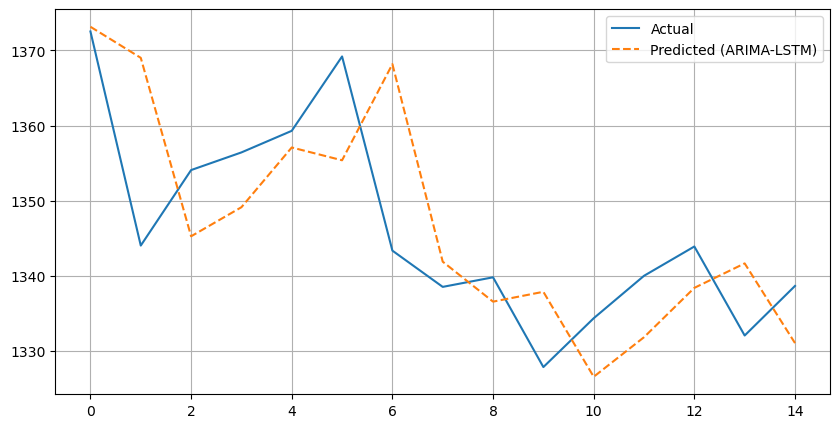

RMSE is 11.541963873256961


In [57]:
arima_lstm_predictions=np.array(predictions_arima[:n_pred])+np.array(lstm_predictions)
plt.figure(figsize=(10, 5))
plt.plot(X_test.iloc[:n_pred],label="Actual")
plt.plot(arima_lstm_predictions,label='Predicted (ARIMA-LSTM)', linestyle='--')
plt.grid(True)


plt.legend()
plt.show()


rmse = np.sqrt(mean_squared_error(X_test[:n_pred],arima_lstm_predictions))
print(f"RMSE is {rmse}")
